<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/STAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import importlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('/content/MEF-DATA.xlsx')
data.drop(data.loc[data['Date'].duplicated()].index, inplace = True)
#df['datetime'] = pd.to_datetime(df['Date'])

# df = df.sort_values(df['datetime'], ascending=[True])

data.set_index(data['Date'], inplace = True)
data.drop(columns = ['Date'], inplace = True)
data.tail()

,Generation without Renewbles,Emission,Electricity price
Date,,,
2019-12-31 18:59:59.982,39770.082481,9108.529801,41.866862
2019-12-31 19:59:59.982,37786.380986,8674.740229,40.663287
2019-12-31 20:59:59.982,37386.850362,7923.937366,40.663287
2019-12-31 21:59:59.982,34511.549048,7470.995505,40.663287
2019-12-31 22:59:59.982,31848.634781,7470.995505,38.162235


 there are several Python packages that you can use to estimate time-varying smooth transition regression (TV-STR) models. Here are three popular ones:

statsmodels: This is a Python package that provides a wide range of statistical models, including TV-STR models. You can use the markov_regression function in the statsmodels.tsa.regime_switching module to estimate TV-STR models. Here's an example:

In [3]:
 #take first diff time series
ret = data-data.shift()[1:]
#eliminate this if not first diff time series
ret = ret[1:]
print(ret)

                         Generation without Renewbles     Emission  \
Date                                                                 
2019-01-01 00:59:59.983                  -1045.247696    19.616814   
2019-01-01 01:59:59.983                    250.171245   118.240055   
2019-01-01 02:59:59.983                  -1223.486013   306.957799   
2019-01-01 03:59:59.983                    -28.220236  1284.841991   
2019-01-01 04:59:59.983                   2019.905311  1455.265215   
...                                               ...          ...   
2019-12-31 18:59:59.982                   -544.773296  -570.296398   
2019-12-31 19:59:59.982                  -1983.701495  -433.789573   
2019-12-31 20:59:59.982                   -399.530624  -750.802862   
2019-12-31 21:59:59.982                  -2875.301315  -452.941861   
2019-12-31 22:59:59.982                  -2662.914267     0.000000   

                         Electricity price   
Date                                       

In [ ]:
ret.iloc[:,0]

Date
2019-01-01 00:59:59.983   -1045.247696
2019-01-01 01:59:59.983     250.171245
2019-01-01 02:59:59.983   -1223.486013
2019-01-01 03:59:59.983     -28.220236
2019-01-01 04:59:59.983    2019.905311
                              ...     
2019-12-31 18:59:59.982    -544.773296
2019-12-31 19:59:59.982   -1983.701495
2019-12-31 20:59:59.982    -399.530624
2019-12-31 21:59:59.982   -2875.301315
2019-12-31 22:59:59.982   -2662.914267
Name: Generation without Renewbles, Length: 8759, dtype: float64

In [ ]:
ret

,Generation without Renewbles,Emission,Electricity price
Date,,,
2019-01-01 00:59:59.983,-1045.247696,19.616814,-0.588909
2019-01-01 01:59:59.983,250.171245,118.240055,-0.739308
2019-01-01 02:59:59.983,-1223.486013,306.957799,0.000000
2019-01-01 03:59:59.983,-28.220236,1284.841991,0.000000
2019-01-01 04:59:59.983,2019.905311,1455.265215,-33.762692
...,...,...,...
2019-12-31 18:59:59.982,-544.773296,-570.296398,-3.572581
2019-12-31 19:59:59.982,-1983.701495,-433.789573,-1.203575
2019-12-31 20:59:59.982,-399.530624,-750.802862,0.000000


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the data and remove missing values
ret = ret.dropna()
y = ret['Generation without Renewbles']
x1 = ret['Emission']
x2 = ret['Electricity price ']

# Estimate a TV-STR model and let the number of regimes be determined automatically
exog = np.column_stack((x1, x2))
model = sm.tsa.MarkovRegression(y, k_regimes=2, exog=exog)
result = model.fit(method='ncg', maxiter=10000, ftol=1e-6)
print(result.summary())


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             Markov Switching Model Results                             
Dep. Variable:     Generation without Renewbles   No. Observations:                 8759
Model:                         MarkovRegression   Log Likelihood              -76069.900
Date:                          Mon, 20 Feb 2023   AIC                         152157.800
Time:                                  08:54:33   BIC                         152221.500
Sample:                                       0   HQIC                        152179.505
                                         - 8759                                         
Covariance Type:                         approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -174.5077     40.290     -4.331      0.

In [ ]:
print(result.params)

p[0->0]     4.401362e-01
p[1->0]     4.009684e-01
const[0]   -1.745077e+02
const[1]    8.320825e+01
x1[0]       7.636989e-01
x1[1]       1.176660e+00
x2[0]       4.730621e+01
x2[1]       2.424996e+02
sigma2      1.792685e+06
dtype: float64


In [ ]:
const_coeffs = result.params[['const[0]', 'const[1]']].values
x1_coeffs = result.params[['x1[0]', 'x1[1]']].values
x2_coeffs = result.params[['x2[0]', 'x2[1]']].values
print(const_coeffs)
print(x1_coeffs)
print(x2_coeffs)

[-174.5076779    83.20825363]
[0.76369887 1.17665958]
[ 47.30621126 242.49958372]


In [ ]:
coeffs = np.array([    [result.params['const[0]'], result.params['const[1]'], result.params['x1[0]'], result.params['x1[1]'], result.params['x2[0]'], result.params['x2[1]']]
])

In [ ]:
coeffs = np.array([[result.params['const[0]'], result.params['const[1]'], result.params['x1[0]'], result.params['x1[1]'], result.params['x2[0]'], result.params['x2[1]']]
])

probs = result.smoothed_marginal_probabilities[0]
probs_arr = probs.values.reshape(-1, 1)

weighted_coefs = probs_arr * coeffs


In [ ]:
import pandas as pd

# Create a DataFrame from the weighted_coefs matrix
df = pd.DataFrame(weighted_coefs, columns=['index','Constant', 'x1[0]', 'x1[1]', 'x2[0]', 'x2[1]'])

# Save the DataFrame to an Excel file
df.to_excel('weighted_coefs.xlsx', index=False)

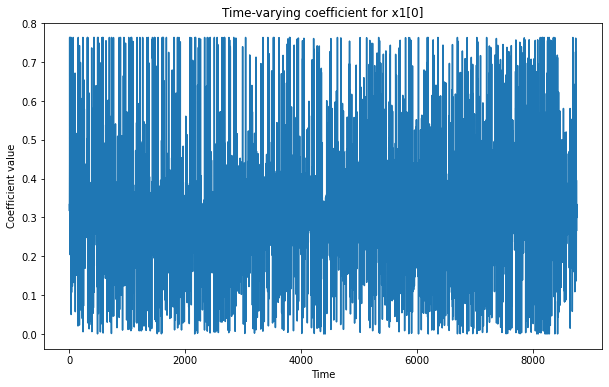

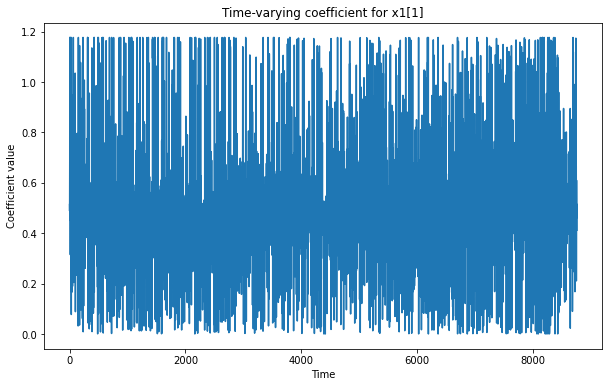

In [ ]:
# Plot for x1[0]
plt.figure(figsize=(10,6))
plt.plot(weighted_coefs[:, 2])
plt.title('Time-varying coefficient for x1[0]')
plt.xlabel('Time')
plt.ylabel('Coefficient value')
plt.show()

# Plot for x1[1]
plt.figure(figsize=(10,6))
plt.plot(weighted_coefs[:, 3])
plt.title('Time-varying coefficient for x1[1]')
plt.xlabel('Time')
plt.ylabel('Coefficient value')
plt.show()



In [ ]:
print(result.params)

p[0->0]     4.401362e-01
p[1->0]     4.009684e-01
const[0]   -1.745077e+02
const[1]    8.320825e+01
x1[0]       7.636989e-01
x1[1]       1.176660e+00
x2[0]       4.730621e+01
x2[1]       2.424996e+02
sigma2      1.792685e+06
dtype: float64


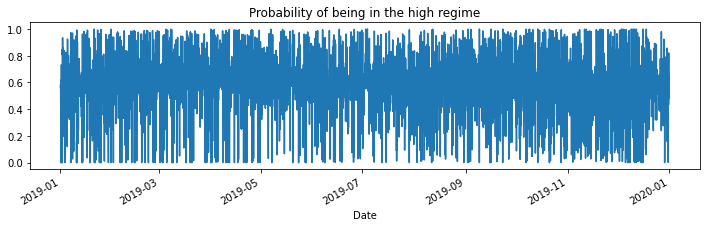

In [ ]:
result.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the high regime", figsize=(12, 3))

In [ ]:
print(result.expected_durations)

[1.78614857 2.49396217]


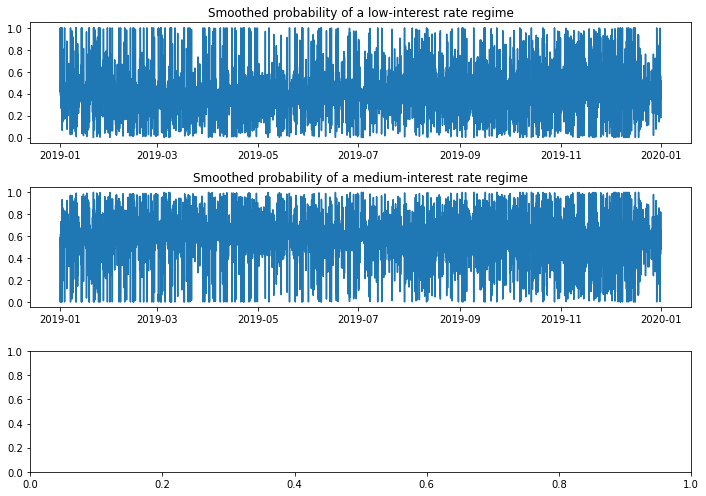

In [ ]:
fig, axes = plt.subplots(3, figsize=(10, 7))

ax = axes[0]
ax.plot(result.smoothed_marginal_probabilities[0])
ax.set(title="Smoothed probability of a low-interest rate regime")

ax = axes[1]
ax.plot(result.smoothed_marginal_probabilities[1])
ax.set(title="Smoothed probability of a medium-interest rate regime")


fig.tight_layout()

lstar

In [121]:
import numpy as np

def G1(gamma, c, s_t):
    return 1 / (1 + np.exp(-gamma * (s_t - c)))

def lstr1_model(phi, theta, gamma, c, u, x, s):
    T = len(u)
    y = np.zeros(T)
    for t in range(T):
        y[t] = np.dot(x[t], phi) + np.dot(x[t], theta) * G1(gamma, c, s[t]) + u[t]
    return y


In [122]:
import numpy as np

def G1(gamma, c, s_t):
    return 1 / (1 + np.exp(-gamma * (s_t - c)))

def lstr1_model(phi, theta, gamma, c, u, x, s):
    T = len(u)
    y = np.zeros(T)
    for t in range(T):
        x_t = np.array([1, x[t], s[t]])
        y[t] = np.dot(x_t, phi) + np.dot(x_t, theta) * G1(gamma, c, s[t]) + u[t]
    return y

# example usage
y = ret['Generation without Renewbles']
x = ret['Emission']
s = ret['Electricity price ']
T = len(y)
u = np.random.normal(0, 1, T)
phi = np.array([0.1, 0.2, 0.3])
theta = np.array([0.4, 0.5, 0.6])
gamma = 1.5
c = 0.5

y_pred = lstr1_model(phi, theta, gamma, c, u, x, s)

# compute the root mean squared error
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print("RMSE:", rmse)


RMSE: 1851.3191624305377


In [134]:
import statsmodels.api as sm

def lstr1_model(phi, theta, gamma, c, sigma, y, x, s):
    # construct explanatory variables matrix
    X = sm.add_constant(np.column_stack((x, s, (x * theta[1] + s * theta[2]) * (1 / (1 + np.exp(-gamma * (s - c)))))))
    # fit the model
    model = sm.OLS(y, X).fit()
    # calculate R-squared
    r_squared = model.rsquared
    # obtain summary of the estimation results
    summary = model.summary()
    return model.params, model.resid, r_squared, summary

# apply the model
phi = np.array([1, 1, 1])
theta = np.array([1, 1, 1])
gamma = 0.5
c = 0.5
sigma = 1

y = ret['Generation without Renewbles']
x = ret['Emission']
s = ret['Electricity price ']

params, resid, r_squared, summary = lstr1_model(phi, theta, gamma, c, sigma, y, x, s)

# print the results
print("Parameters:")
print(params)
print("Residuals:")
print(resid)
print("R-squared:")
print(r_squared)
print("Summary:")
print(summary)


Parameters:
const    -19.934681
x1         0.983898
x2       110.434017
x3         0.157242
dtype: float64
Residuals:
Date
2019-01-01 00:59:59.983    -980.676864
2019-01-01 01:59:59.983     228.950577
2019-01-01 02:59:59.983   -1526.698579
2019-01-01 03:59:59.983   -1360.892178
2019-01-01 04:59:59.983    4336.557803
                              ...     
2019-12-31 18:59:59.982     441.226370
2019-12-31 19:59:59.982   -1383.591433
2019-12-31 20:59:59.982     410.805469
2019-12-31 21:59:59.982   -2378.535890
2019-12-31 22:59:59.982   -2366.706573
Length: 8759, dtype: float64
R-squared:
0.5054108901362997
Summary:
                                 OLS Regression Results                                 
Dep. Variable:     Generation without Renewbles   R-squared:                       0.505
Model:                                      OLS   Adj. R-squared:                  0.505
Method:                           Least Squares   F-statistic:                     2982.
Date:                   

In [154]:
 x_t = x.iloc[:, 0]
 x_t

Date
2019-01-01 00:59:59.983      19.616814
2019-01-01 01:59:59.983     118.240055
2019-01-01 02:59:59.983     306.957799
2019-01-01 03:59:59.983    1284.841991
2019-01-01 04:59:59.983    1455.265215
                              ...     
2019-12-31 18:59:59.982    -570.296398
2019-12-31 19:59:59.982    -433.789573
2019-12-31 20:59:59.982    -750.802862
2019-12-31 21:59:59.982    -452.941861
2019-12-31 22:59:59.982       0.000000
Name: Emission, Length: 8759, dtype: float64

In [155]:
import numpy as np
from scipy.optimize import curve_fit

def transition_function(s_t, gamma, c):
    return 1 / (1 + np.exp(-gamma * (s_t - c)))

def STR(x, phi0, phi1, phi2, theta0, theta1, theta2, gamma, c):
    x_t = x.iloc[:, 0]
    s_t = x.iloc[:, 1]
    G = transition_function(s_t, gamma, c)
    y_hat = phi0 + phi1 * x_t + phi2 * s_t + (theta0 + theta1 * x_t + theta2 * s_t) * G
    return y_hat

# x is a 2D array containing the values of x and s
# y is a 1D array containing the values of y
y = ret['Generation without Renewbles']
x = ret[['Emission', 'Electricity price ']]
#s = ret['Electricity price ']
# initial guesses for the parameters
phi0_0, phi1_0, phi2_0 = 0, 0, 0
theta0_0, theta1_0, theta2_0 = 0, 0, 0
gamma_0, c_0 = 1, 0

# estimate the parameters using nonlinear least squares
p0 = [phi0_0, phi1_0, phi2_0, theta0_0, theta1_0, theta2_0, gamma_0, c_0]
popt, pcov = curve_fit(STR, x, y, p0)

# print the estimated parameters
print(popt)


[-7.05185509e+02  1.69044553e+00 -8.46261605e+00  6.56211575e+02
 -6.89616307e-01  1.57126214e+02  1.45067093e+00 -1.14807326e+01]


In [156]:
from sklearn.metrics import r2_score

# calculate R-squared value
y_pred = STR(x, *popt)
r2 = r2_score(y, y_pred)
print("R-squared value: ", r2)


R-squared value:  0.5280156646560685


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def transition_function(s_t, gamma, c):
    return 1 / (1 + np.exp(-gamma * (s_t - c)))

def STR(x, phi0, phi1, phi2, theta0, theta1, theta2, gamma, c):
    x_t = x.iloc[:, 0]
    s_t = x.iloc[:, 1]
    G = transition_function(s_t, gamma, c)
    y_hat = phi0 + phi1 * x_t + phi2 * s_t + (theta0 + theta1 * x_t + theta2 * s_t) * G
    return y_hat

# y is a 1D array containing the values of y
y = ret['Generation without Renewbles']
x = ret[['Emission', 'Electricity price ']]
#s = ret['Electricity price ']

# specify the window size
window_size = 24

# loop over the data, fitting the model to a rolling window of size window_size
coefficients = []
for i in range(window_size, len(y)):
    y_window = y[i-window_size:i]
    x_window = x.iloc[i-window_size:i, :]
    
    # initial guesses for the parameters
    phi0_0, phi1_0, phi2_0 = -237.00540, 0.5416, 447.98395
    theta0_0, theta1_0, theta2_0 = 601.20749, 0.91319, -422.49485
    gamma_0, c_0 = 0.50000, -6.41804

    # estimate the parameters using nonlinear least squares
    p0 = [phi0_0, phi1_0, phi2_0, theta0_0, theta1_0, theta2_0, gamma_0, c_0]
    popt, pcov = curve_fit(STR, x_window, y_window, p0, maxfev=5000000)
    
    # save the coefficients
    coefficients.append(popt)

# convert the coefficients to a numpy array
coefficients = np.array(coefficients)

# extract the time-varying coefficients
phi0_t = coefficients[:, 0]
phi1_t = coefficients[:, 1]
phi2_t = coefficients[:, 2]
theta0_t = coefficients[:, 3]
theta1_t = coefficients[:, 4]
theta2_t = coefficients[:, 5]
